# Import Section

In [1]:
import logging
import warnings

import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

# Disable all warnings
warnings.filterwarnings("ignore")

# Set global plot style
plt.style.use("seaborn-v0_8-ticks")
# Set global font family
plt.rcParams["font.family"] = "times new roman"
# Use magic Jupyter for inline plotting
%matplotlib inline

## 云砧，原位卷云，DCS的时间序列图像

#### 先读取他们的数据

In [2]:
# ----------------------------------------------------------------------
# Load monthly cirrus classification data
# ----------------------------------------------------------------------
# monthly_freq_file = "/RAID01/data/PROJECT_CIRRUS_CLASSIFICATION/CloudSat_Cirrus_classification_grid/monthly_cirrus_class_3000m_overlay_DCS_frequency_60_120.nc"
# monthly_length_file = "/RAID01/data/PROJECT_CIRRUS_CLASSIFICATION/CloudSat_Cirrus_classification_grid/monthly_cirrus_length_SINGLE_EXPANSION.nc"

monthly_freq_file = "data_temp/monthly_cirrus_class_3000m_overlay_DCS_frequency_60_120.nc"
monthly_length_file = (
    "data_temp/monthly_cirrus_length_SINGLE_EXPANSION.nc"
)

monthly_freq_da = xr.open_dataset(monthly_freq_file, engine="h5netcdf")
monthly_length_da = xr.open_dataset(
    monthly_length_file, engine="h5netcdf"
)

#### 验证数据-Insitu和Anvil的空间分布和理性

In [ ]:
def plot_global_single_hemisphere_with_robinson_vertical(
    data,
    min_val,
    max_val,
    cb_label,
    title,
    cmap="RdYlBu_r",
    grid_shape=(90, 180),
):

    # Set the font
    plt.rcParams.update({"font.family": "Times New Roman"})

    # Calculate the step size for longitude and latitude
    lon_step = 360 / grid_shape[1]
    lat_step = 180 / grid_shape[0]

    # Create longitude and latitude arrays
    lon = np.linspace(
        -180, 180 - lon_step, grid_shape[1], dtype=np.float32
    )
    lat = np.linspace(
        -90, 90 - lat_step, grid_shape[0], dtype=np.float32
    )

    # Create figure and gridspec
    fig = plt.figure(
        figsize=(8, 4), dpi=380
    )  # Adjusted figure size for vertical layout
    gs = gridspec.GridSpec(
        1,
        2,
        width_ratios=[1, 0.04],
        wspace=0.1,
    )

    # Create subplots with Robinson projection
    ax = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson())
    cax = fig.add_subplot(gs[:, 1])  # Colorbar spans both rows

    # Set up the colormap
    cmap = plt.get_cmap(cmap)
    cmap.set_under(color="white")
    cmap.set_bad(color="grey")

    # Set the global extent
    ax.set_global()

    # Plot the data
    im = ax.pcolormesh(
        lon,
        lat,
        data,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        vmin=min_val,
        vmax=max_val,
    )

    # Add coastlines
    ax.coastlines(resolution="50m", lw=0.5)

    # Set extent to 81S to 81N
    ax.set_extent([-180, 180, -81, 81], crs=ccrs.PlateCarree())

    # Add title
    ax.set_title(title, fontsize=15, pad=10, fontweight="bold")

    # Add gridlines
    gl = ax.gridlines(
        linestyle="-.", lw=0.2, alpha=0.5, draw_labels=True
    )
    gl.top_labels = False
    gl.right_labels = False

    # Add a colorbar that spans both subplots
    cb = fig.colorbar(
        im, cax=cax, orientation="vertical", shrink=0.8
    )  # Add upward arrow
    cb.set_label(label=cb_label, fontsize=12)

    plt.tight_layout()
    plt.show()


plot_global_single_hemisphere_with_robinson_vertical(
    data=monthly_freq_da["insitu_mask"].values[2],
    min_val=0,
    max_val=0.3,
    cb_label="Insitu Cirrus Frequency",
    title=None,
    cmap="RdYlBu_r",
    grid_shape=(36, 72),
)
plot_global_single_hemisphere_with_robinson_vertical(
    data=monthly_freq_da["anvil_mask"].values[2],
    min_val=0,
    max_val=0.3,
    cb_label="Anvil Cirrus Frequency",
    title=None,
    cmap="RdYlBu_r",
    grid_shape=(36, 72),
)

plot_global_single_hemisphere_with_robinson_vertical(
    data=monthly_length_da["insitu_length"].values[2],
    min_val=None,
    max_val=None,
    cb_label="Insitu Cirrus Length",
    title=None,
    cmap="RdYlBu_r",
    grid_shape=(36, 72),
)
plot_global_single_hemisphere_with_robinson_vertical(
    data=monthly_length_da["anvil_length"].values[2],
    min_val=None,
    max_val=None,
    cb_label="Anvil Cirrus Length",
    title=None,
    cmap="RdYlBu_r",
    grid_shape=(36, 72),
)
plot_global_single_hemisphere_with_robinson_vertical(
    data=monthly_length_da["DCS_length"].values[2],
    min_val=None,
    max_val=None,
    cb_label="DCS Length",
    title=None,
    cmap="RdYlBu_r",
    grid_shape=(36, 72),
)

In [ ]:
# Contains 4 variables: insitu, all_anvil, initial_anvil, DCS
# Shape is (month, height, lat, lon) - (129, 125, 90, 180
# Extract the variables
insitu_monthly = (
    monthly_freq_da["insitu_mask"].sel(month=slice(None, "2011-05-01"))
    / 2
    * 10
)
all_anvil_monthly = (
    monthly_freq_da["anvil_mask"].sel(month=slice(None, "2011-05-01"))
    * 10
)
DCS_monthly = (
    monthly_freq_da["DCS_mask"].sel(month=slice(None, "2011-05-01")) / 2
) * 10

# Process the length variables
insitu_monthly_length = (
    monthly_length_da["insitu_length"].sel(
        time=slice(None, "2011-05-01")
    )
)
all_anvil_monthly_length = monthly_length_da["anvil_length"].sel(
    time=slice(None, "2011-05-01")
)
DCS_monthly_length = (
    monthly_length_da["DCS_length"].sel(time=slice(None, "2011-05-01"))
)

# Extract time and geo coords data
months = (
    monthly_freq_da["month"]
    .sel(month=slice(None, "2011-05-01"))
    .values.astype("datetime64[M]")
)
latitudes = monthly_freq_da["lat"].values[1:-1]
longitudes = monthly_freq_da["lon"].values

#### 把数据时间序列读取后，补全时间序列（在缺失值处填充NAN）

##### 补全mask序列

In [4]:
# ----------------------------------------------------------------------
# Get full datetime range from start to end
# ----------------------------------------------------------------------
start_time = months[0]
end_time = months[-1]

# Create a date range for first day of each month
full_time_range = pd.date_range(
    start=start_time, end=end_time, freq="MS"
)

# ----------------------------------------------------------------------
# Divide cloud type data into northern and southern hemispheres
# ----------------------------------------------------------------------
# First, identify which latitudes belong to northern and southern hemispheres
north_hemisphere_mask = latitudes >= 0
south_hemisphere_mask = latitudes < 0

north_lat_indices = np.where(north_hemisphere_mask)[0]
south_lat_indices = np.where(south_hemisphere_mask)[0]

# Create separate arrays for north and south hemispheres
# For in-situ cirrus
insitu_north = insitu_monthly.values[:, north_lat_indices, :]
insitu_south = insitu_monthly.values[:, south_lat_indices, :]

# For anvil cirrus
all_anvil_north = all_anvil_monthly.values[:, north_lat_indices, :]
all_anvil_south = all_anvil_monthly.values[:, south_lat_indices, :]

# For deep convective systems (DCS)
DCS_north = DCS_monthly.values[:, north_lat_indices, :]
DCS_south = DCS_monthly.values[:, south_lat_indices, :]

# Calculate mean frequencies for each hemisphere
# Northern Hemisphere
insitu_freq_north = np.nanmean(insitu_north, axis=(1, 2))
all_anvil_freq_north = np.nanmean(all_anvil_north, axis=(1, 2))
DCS_freq_north = np.nanmean(DCS_north, axis=(1, 2))

# Southern Hemisphere
insitu_freq_south = np.nanmean(insitu_south, axis=(1, 2))
all_anvil_freq_south = np.nanmean(all_anvil_south, axis=(1, 2))
DCS_freq_south = np.nanmean(DCS_south, axis=(1, 2))

# Create time series with proper datetime indices
insitu_freq_north_series = pd.Series(insitu_freq_north, index=months)
all_anvil_freq_north_series = pd.Series(
    all_anvil_freq_north, index=months
)
DCS_freq_north_series = pd.Series(DCS_freq_north, index=months)

insitu_freq_south_series = pd.Series(insitu_freq_south, index=months)
all_anvil_freq_south_series = pd.Series(
    all_anvil_freq_south, index=months
)
DCS_freq_south_series = pd.Series(DCS_freq_south, index=months)

# Create full time series with NaN values for northern hemisphere
insitu_north_full = pd.Series(np.nan, index=full_time_range)
all_anvil_north_full = pd.Series(np.nan, index=full_time_range)
DCS_north_full = pd.Series(np.nan, index=full_time_range)

# Fill available values for northern hemisphere
insitu_north_full[months] = insitu_freq_north_series
all_anvil_north_full[months] = all_anvil_freq_north_series
DCS_north_full[months] = DCS_freq_north_series

# Create full time series with NaN values for southern hemisphere
insitu_south_full = pd.Series(np.nan, index=full_time_range)
all_anvil_south_full = pd.Series(np.nan, index=full_time_range)
DCS_south_full = pd.Series(np.nan, index=full_time_range)

# Fill available values for southern hemisphere
insitu_south_full[months] = insitu_freq_south_series
all_anvil_south_full[months] = all_anvil_freq_south_series
DCS_south_full[months] = DCS_freq_south_series

In [5]:
# ----------------------------------------------------------------------
# Get full datetime range from start to end
# ----------------------------------------------------------------------
start_time = months[0]
end_time = months[-1]

# Create a date range for first day of each month
full_time_range = pd.date_range(
    start=start_time, end=end_time, freq="MS"
)

# ----------------------------------------------------------------------
# Divide cloud type data into northern and southern hemispheres
# ----------------------------------------------------------------------
# First, identify which latitudes belong to northern and southern hemispheres
north_hemisphere_mask = latitudes >= 0
south_hemisphere_mask = latitudes < 0

north_lat_indices = np.where(north_hemisphere_mask)[0]
south_lat_indices = np.where(south_hemisphere_mask)[0]

# Create separate arrays for north and south hemispheres
# For in-situ cirrus
insitu_north = insitu_monthly.values[:, north_lat_indices, :]
insitu_south = insitu_monthly.values[:, south_lat_indices, :]

# For anvil cirrus
all_anvil_north = all_anvil_monthly.values[:, north_lat_indices, :]
all_anvil_south = all_anvil_monthly.values[:, south_lat_indices, :]

# For deep convective systems (DCS)
DCS_north = DCS_monthly.values[:, north_lat_indices, :]
DCS_south = DCS_monthly.values[:, south_lat_indices, :]

# Get spatial dimensions for north and south hemispheres
n_months = len(months)
n_north_lats = len(north_lat_indices)
n_south_lats = len(south_lat_indices)
n_lons = insitu_monthly.shape[
    2
]  # Assuming longitude is the last dimension

# Determine full time range length
n_full_times = len(full_time_range)

# Create full time arrays with NaN values for northern hemisphere (preserving spatial dimensions)
insitu_north_full = np.full(
    (n_full_times, n_north_lats, n_lons), np.nan
)
all_anvil_north_full = np.full(
    (n_full_times, n_north_lats, n_lons), np.nan
)
DCS_north_full = np.full((n_full_times, n_north_lats, n_lons), np.nan)

# Create full time arrays with NaN values for southern hemisphere (preserving spatial dimensions)
insitu_south_full = np.full(
    (n_full_times, n_south_lats, n_lons), np.nan
)
all_anvil_south_full = np.full(
    (n_full_times, n_south_lats, n_lons), np.nan
)
DCS_south_full = np.full((n_full_times, n_south_lats, n_lons), np.nan)

# Map the available months to indices in the full time range
month_indices = np.array(
    [np.where(full_time_range == month)[0][0] for month in months]
)

# Fill available values for northern hemisphere (preserving spatial dimensions)
for i, idx in enumerate(month_indices):
    insitu_north_full[idx] = insitu_north[i]
    all_anvil_north_full[idx] = all_anvil_north[i]
    DCS_north_full[idx] = DCS_north[i]

# Fill available values for southern hemisphere (preserving spatial dimensions)
for i, idx in enumerate(month_indices):
    insitu_south_full[idx] = insitu_south[i]
    all_anvil_south_full[idx] = all_anvil_south[i]
    DCS_south_full[idx] = DCS_south[i]

# Create xarray DataArrays to maintain proper dimensions and coordinates
# For Northern Hemisphere
insitu_north_full_xr = xr.DataArray(
    insitu_north_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[north_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

all_anvil_north_full_xr = xr.DataArray(
    all_anvil_north_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[north_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

DCS_north_full_xr = xr.DataArray(
    DCS_north_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[north_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

# For Southern Hemisphere
insitu_south_full_xr = xr.DataArray(
    insitu_south_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[south_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

all_anvil_south_full_xr = xr.DataArray(
    all_anvil_south_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[south_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

DCS_south_full_xr = xr.DataArray(
    DCS_south_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[south_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

##### 补全length序列

In [6]:
# Create separate arrays for north and south hemispheres for all length data
# For in-situ cirrus length
insitu_length_north = insitu_monthly_length.values[
    :, north_lat_indices, :
]
insitu_length_south = insitu_monthly_length.values[
    :, south_lat_indices, :
]

# For anvil cirrus length
all_anvil_length_north = all_anvil_monthly_length.values[
    :, north_lat_indices, :
]
all_anvil_length_south = all_anvil_monthly_length.values[
    :, south_lat_indices, :
]

# For deep convective systems (DCS) length
DCS_length_north = DCS_monthly_length.values[:, north_lat_indices, :]
DCS_length_south = DCS_monthly_length.values[:, south_lat_indices, :]

# Calculate mean lengths for each hemisphere
# Northern Hemisphere
insitu_length_mean_north = np.nanmean(insitu_length_north, axis=(1, 2))
all_anvil_length_mean_north = np.nanmean(
    all_anvil_length_north, axis=(1, 2)
)
DCS_length_mean_north = np.nanmean(DCS_length_north, axis=(1, 2))

# Southern Hemisphere
insitu_length_mean_south = np.nanmean(insitu_length_south, axis=(1, 2))
all_anvil_length_mean_south = np.nanmean(
    all_anvil_length_south, axis=(1, 2)
)
DCS_length_mean_south = np.nanmean(DCS_length_south, axis=(1, 2))

# Create time series with proper datetime indices
insitu_length_north_series = pd.Series(
    insitu_length_mean_north, index=months
)
all_anvil_length_north_series = pd.Series(
    all_anvil_length_mean_north, index=months
)
DCS_length_north_series = pd.Series(DCS_length_mean_north, index=months)

insitu_length_south_series = pd.Series(
    insitu_length_mean_south, index=months
)
all_anvil_length_south_series = pd.Series(
    all_anvil_length_mean_south, index=months
)
DCS_length_south_series = pd.Series(DCS_length_mean_south, index=months)

# Create full time series with NaN values for northern hemisphere
insitu_length_north_full = pd.Series(np.nan, index=full_time_range)
all_anvil_length_north_full = pd.Series(np.nan, index=full_time_range)
DCS_length_north_full = pd.Series(np.nan, index=full_time_range)

# Fill available values for northern hemisphere
insitu_length_north_full[months] = insitu_length_north_series
all_anvil_length_north_full[months] = all_anvil_length_north_series
DCS_length_north_full[months] = DCS_length_north_series

# Create full time series with NaN values for southern hemisphere
insitu_length_south_full = pd.Series(np.nan, index=full_time_range)
all_anvil_length_south_full = pd.Series(np.nan, index=full_time_range)
DCS_length_south_full = pd.Series(np.nan, index=full_time_range)

# Fill available values for southern hemisphere
insitu_length_south_full[months] = insitu_length_south_series
all_anvil_length_south_full[months] = all_anvil_length_south_series
DCS_length_south_full[months] = DCS_length_south_series

In [7]:
# Create separate arrays for north and south hemispheres for all length data
# For in-situ cirrus length
insitu_length_north = insitu_monthly_length.values[
    :, north_lat_indices, :
]
insitu_length_south = insitu_monthly_length.values[
    :, south_lat_indices, :
]

# For anvil cirrus length
all_anvil_length_north = all_anvil_monthly_length.values[
    :, north_lat_indices, :
]
all_anvil_length_south = all_anvil_monthly_length.values[
    :, south_lat_indices, :
]

# For deep convective systems (DCS) length
DCS_length_north = DCS_monthly_length.values[:, north_lat_indices, :]
DCS_length_south = DCS_monthly_length.values[:, south_lat_indices, :]

# Get spatial dimensions for north and south hemispheres
n_months = len(months)
n_north_lats = len(north_lat_indices)
n_south_lats = len(south_lat_indices)
n_lons = insitu_monthly_length.shape[
    2
]  # Assuming longitude is the last dimension

# Determine full time range length
n_full_times = len(full_time_range)

# Create full time arrays with NaN values for northern hemisphere (preserving spatial dimensions)
insitu_length_north_full = np.full(
    (n_full_times, n_north_lats, n_lons), np.nan
)
all_anvil_length_north_full = np.full(
    (n_full_times, n_north_lats, n_lons), np.nan
)
DCS_length_north_full = np.full(
    (n_full_times, n_north_lats, n_lons), np.nan
)

# Create full time arrays with NaN values for southern hemisphere (preserving spatial dimensions)
insitu_length_south_full = np.full(
    (n_full_times, n_south_lats, n_lons), np.nan
)
all_anvil_length_south_full = np.full(
    (n_full_times, n_south_lats, n_lons), np.nan
)
DCS_length_south_full = np.full(
    (n_full_times, n_south_lats, n_lons), np.nan
)

# Map the available months to indices in the full time range
month_indices = np.array(
    [np.where(full_time_range == month)[0][0] for month in months]
)

# Fill available values for northern hemisphere (preserving spatial dimensions)
for i, idx in enumerate(month_indices):
    insitu_length_north_full[idx] = insitu_length_north[i]
    all_anvil_length_north_full[idx] = all_anvil_length_north[i]
    DCS_length_north_full[idx] = DCS_length_north[i]

# Fill available values for southern hemisphere (preserving spatial dimensions)
for i, idx in enumerate(month_indices):
    insitu_length_south_full[idx] = insitu_length_south[i]
    all_anvil_length_south_full[idx] = all_anvil_length_south[i]
    DCS_length_south_full[idx] = DCS_length_south[i]

# Create xarray DataArrays to maintain proper dimensions and coordinates
# For Northern Hemisphere length data
insitu_length_north_full_xr = xr.DataArray(
    insitu_length_north_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[north_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

all_anvil_length_north_full_xr = xr.DataArray(
    all_anvil_length_north_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[north_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

DCS_length_north_full_xr = xr.DataArray(
    DCS_length_north_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[north_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

# For Southern Hemisphere length data
insitu_length_south_full_xr = xr.DataArray(
    insitu_length_south_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[south_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

all_anvil_length_south_full_xr = xr.DataArray(
    all_anvil_length_south_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[south_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

DCS_length_south_full_xr = xr.DataArray(
    DCS_length_south_full,
    dims=("time", "lat", "lon"),
    coords={
        "time": full_time_range,
        "lat": latitudes[south_lat_indices],
        "lon": insitu_monthly.lon,
    },
)

In [8]:
insitu_north_full_xr
DCS_north_full_xr
insitu_south_full_xr
DCS_south_full_xr

insitu_length_north_full_xr
DCS_length_north_full_xr
insitu_length_south_full_xr
DCS_length_south_full_xr

<xarray.DataArray (time: 59, lat: 17, lon: 72)> Size: 578kB
array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [ 23.70512772,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [ 34.51734161,   0.        ,   0.        , ...,  44.29695511,
          79.88308716,  17.06097603],
        [ 16.13492012,   0.        ,  20.29999924, ...,  35.96601868,
          48.1222229 ,  16.33333397]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
...
        [ 55.58411026,   9.88709641,  27.55462265, ...,  72.4391861 ,
          25.04347801,   8.80434799],
        [ 26.80065346,  68.01515198,  22.84615326, ...,   6.72222233,
           6.0333333 ,   7.71212101],
        [  0.        ,  48.38435364,  10.125     , ...,   0.        ,
          36.76823044,  11.11111069]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [ 43.22868347,  12.59523773,   0.        , ...,  38.86871338,
          18.47950745,  17.63750076],
        [  7.19999981,   5.33333349,   9.63333321, ...,   0.        ,
          17.35294151,   0.        ],
        [ 16.0714283 ,   0.        ,   6.25      , ...,   0.        ,
          86.50887299,  10.61764717]]], shape=(59, 17, 72))
Coordinates:
  * time     (time) datetime64[ns] 472B 2006-06-01 2006-07-01 ... 2011-04-01
  * lat      (lat) float32 68B -84.91 -79.83 -74.74 ... -13.71 -8.629 -3.543
  * lon      (lon) float32 288B -180.0 -175.0 -169.9 ... 167.9 173.0 178.0

# 空间数据去季节和处理函数

In [10]:
# -------------------------------------------- #
# helper: 自动生成 season 标签 (DJF/MAM/JJA/SON)
# -------------------------------------------- #
def _season_label(time_index):
    month = time_index.dt.month
    return xr.DataArray(
        np.select(
            [
                month.isin([12, 1, 2]),
                month.isin([3, 4, 5]),
                month.isin([6, 7, 8]),
                month.isin([9, 10, 11]),
            ],
            ["DJF", "MAM", "JJA", "SON"],
        ),
        coords={"time": time_index},
        dims="time",
        name="season",
    )


# -------------------------------------------- #
# deseasonalize 核心
# -------------------------------------------- #
def deseasonalize(
    da: xr.DataArray,
    method: str = "month",  # "month" 或 "season"
    standardize: bool = True,  # 是否标准化
) -> xr.DataArray:
    """
    仅做 *去季节* 不去趋势。

    Parameters
    ----------
    da : xr.DataArray
        输入 (time, lat, lon) 数据
    method : {"month", "season"}
        - "month"  : 用 12 个月平均构成 climatology
        - "season" : 用 4 个气象季(DJF/MAM/JJA/SON)平均构成 climatology
    standardize : bool
        True → (x-mean)/std，False → 仅 anomaly

    Returns
    -------
    xr.DataArray （与输入形状一致）
        去季节（并可选标准化）后的异常场
    """
    if "time" not in da.dims:
        raise ValueError("Needs a 'time' dimension")

    if method == "month":
        clim = da.groupby("time.month").mean("time")
        anom = da.groupby("time.month") - clim
    elif method == "season":
        season = _season_label(da["time"])
        clim = da.groupby(season).mean("time")
        anom = da.groupby(season) - clim
    else:
        raise ValueError("method must be 'month' or 'season'")

    if standardize:
        anom = anom / anom.std("time")

    return anom


def corr_and_p(idx: xr.DataArray, target: xr.DataArray):
    """
    对单一指数 idx(time) 与 target(time,lat,lon) 做 Pearson 相关 & p-value.
    """
    r = xr.corr(idx, target, dim="time")
    p = xr.apply_ufunc(
        lambda x, y: sts.pearsonr(x, y)[1],
        idx,
        target,
        input_core_dims=[["time"], ["time"]],
        vectorize=True,
        dask="parallelized",
        output_dtypes=[float],
    )
    return r, p


def leadlag_corr(
    idx: xr.DataArray, target: xr.DataArray, lags: range
) -> xr.DataArray:
    """
    计算一系列 lag(-) / lead(+) 相关 (返回 DataArray(lag,lat,lon)).
    Positive k = idx leads target by k months.
    """
    r_list = []
    for k in lags:
        if k > 0:
            r, _ = corr_and_p(
                idx.shift(time=k, fill_value=np.nan), target
            )
        elif k < 0:
            r, _ = corr_and_p(
                idx, target.shift(time=-k, fill_value=np.nan)
            )
        else:
            r, _ = corr_and_p(idx, target)
        r_list.append(r)
    r_all = xr.concat(r_list, dim=pd.Index(lags, name="lag"))
    return r_all

### 先把空间数据去季节处理

In [11]:
# -----------------------------------------------------------------------------#
# 2. 数据预处理
# -----------------------------------------------------------------------------#
# 2.1 去季节 / 去趋势 / 标准化
dcs_north_anom = deseasonalize(
    DCS_length_north_full_xr, method="month", standardize=True
)
dcs_south_anom = deseasonalize(
    DCS_length_south_full_xr, method="month", standardize=True
)
insitu_north_anom = deseasonalize(
    insitu_length_north_full_xr, method="month", standardize=True
)
insitu_south_anom = deseasonalize(
    insitu_length_south_full_xr, method="month", standardize=True
)

## 定义半球DCS整体强度指数
定义的方式是用当前半球的DCS异常值的平均，通过纬度的加权平均计算
加权平均使用cosine函数，公式为：
$$
\bar{DCS} = \frac{\sum_{i=1}^{n} DCS_i \cdot cos(\theta_i)}{\sum_{i=1}^{n} cos(\theta_i)}
$$

In [13]:
def hemispheric_index(
    dcs_anom: xr.DataArray,
    hemisphere: str,
    lat_weighted: bool = True,
    lat_band: tuple | None = None,
) -> xr.DataArray:
    """
    从 DCS anomaly 计算简单半球指数。

    Parameters
    ----------
    dcs_anom : DataArray(time, lat, lon)
    hemisphere : "north" / "south"
    lat_weighted : 是否乘 cos(lat)
    lat_band : (lat_min, lat_max) | None
        None → 整半球；否则只取子带(如(0,30) 表示热带)

    Returns
    -------
    idx : DataArray(time)  已标准化
    """
    da = dcs_anom.copy()

    # 1) 选纬带
    if lat_band is not None:
        da = da.sel(lat=slice(lat_band[0], lat_band[1]))

    # 2) 选半球
    if hemisphere == "north":
        da = da.sel(lat=slice(0, None))
    elif hemisphere == "south":
        da = da.sel(lat=slice(None, 0))
    else:
        raise ValueError("hemisphere must be 'north' or 'south'")

    # 3) cos φ 权重
    if lat_weighted:
        weights = np.cos(np.deg2rad(da["lat"]))
        da = da.weighted(weights)

    idx = da.mean(("lat", "lon"))
    # 标准化
    idx = (idx - idx.mean("time")) / idx.std("time")
    idx.name = f"DCS_{hemisphere}_idx"
    return idx


dcs_idx_NH = hemispheric_index(dcs_north_anom, "north", lat_band=None)
dcs_idx_SH = hemispheric_index(dcs_south_anom, "south", lat_band=None)

In [14]:
dcs_idx_NH

<xarray.DataArray 'DCS_north_idx' (time: 59)> Size: 472B
array([-1.55374379, -1.27410825,  0.11347566,  0.01861338, -1.26985553,
       -0.00556402, -1.08625723, -0.26228856,  1.02984874,  1.08044945,
        0.28842404, -0.49726899,  0.50890096, -0.32586562,  0.41016517,
       -0.20810325, -1.00556677, -0.37028747,  1.41181201, -0.25356436,
        0.21109317, -0.40193034,  1.66496671, -0.35708683, -0.24229195,
        0.51755099,  0.26981147, -1.31849063,  0.44384078,         nan,
        1.08464578,  1.84269656, -1.22280159, -1.39357605, -0.08757759,
        0.29683733,  0.70920613,  1.46884314, -0.09948196,  1.07520173,
        1.04656978,  0.98323639, -2.95398089, -1.32684364,  0.99870062,
        0.36656853,  0.64303969,  0.55751849,  0.57792865, -0.38642026,
       -0.69397034,  0.43277877,  0.78501174, -0.6073849 ,  1.54378034,
               nan, -1.01684093,  0.34848842, -2.50885285])
Coordinates:
  * time     (time) datetime64[ns] 472B 2006-06-01 2006-07-01 ... 2011-04-01
    month    (time) int64 472B 6 7 8 9 10 11 12 1 2 3 ... 7 8 9 10 11 12 1 2 3 4

## 计算半球格点原位卷云频次和半球DCS整体面积指数的相关

In [30]:
# -----------------------------------------------------------------------------#
# 2. 格点相关与 p 值
# -----------------------------------------------------------------------------#
def corr_p(
    idx: xr.DataArray,
    target: xr.DataArray,
    min_n: int = 3,
    nan2none: bool = True,
):
    """
    逐格点 Pearson r, p；自动忽略 NaN/常数样本。
    当有效样本 < min_n 或方差为 0 → 返回 r=np.nan, p=np.nan

    Parameters
    ----------
    idx : DataArray(time)
    target : DataArray(time, lat, lon)
    min_n : 最少有效配对点
    nan2none : False 时，把无效格点返回 (0,1) 方便做显著性掩码

    Returns
    -------
    rmap, pmap : DataArray(lat, lon)
    """
    import numpy as np
    import scipy.stats as sts
    import xarray as xr

    def _pearsonr_safe(x, y):
        """一维向量版，内部屏蔽 NaN 与常数"""
        mask = np.isfinite(x) & np.isfinite(y)
        if mask.sum() < min_n:
            return (np.nan, np.nan) if nan2none else (0.0, 1.0)
        x_m, y_m = x[mask], y[mask]
        # 常数序列 => 无方差
        if x_m.std() == 0 or y_m.std() == 0:
            return (np.nan, np.nan) if nan2none else (0.0, 1.0)
        r, p = sts.pearsonr(x_m, y_m)
        return r, p

    r, p = xr.apply_ufunc(
        _pearsonr_safe,  # 函数
        idx,  # *广播* 到 target dims
        target,
        input_core_dims=[["time"], ["time"]],
        output_core_dims=[[], []],  # 两个标量输出
        vectorize=True,
        dask="parallelized",
        output_dtypes=[float, float],
    )
    r.name, p.name = "r", "p"
    return r, p


# NH DCS → SH in-situ
r_NH_SH_og, p_NH_SH_og = corr_p(dcs_idx_NH, insitu_south_anom)
sig_NH_SH_og = p_NH_SH_og < 0.09

# SH DCS → NH in-situ
r_SH_NH_og, p_SH_NH_og = corr_p(dcs_idx_SH, insitu_north_anom)
sig_SH_NH_og = p_SH_NH_og < 0.09

In [31]:
def jitter_da(
    da: xr.DataArray,
    frac: float = 5e-3,
    seed: int | None = None,
    dim: str = "time",
):
    rng = np.random.default_rng(seed)
    scale = da.std(dim, skipna=True)
    noise = xr.DataArray(
        rng.standard_normal(size=da.shape),
        coords=da.coords,
        dims=da.dims,
    )
    return da + frac * scale.broadcast_like(da) * noise.where(da.notnull())

idx_NH = jitter_da(dcs_idx_NH, frac=5e-2, seed=10)
tgt_SH = jitter_da(insitu_south_anom, frac=5e-2, seed=20)
r_NH_SH, p_NH_SH = corr_p(idx_NH, tgt_SH)
sig_NH_SH = p_NH_SH < 0.09

idx_SH = jitter_da(dcs_idx_SH, frac=5e-2, seed=30)
tgt_NH = jitter_da(insitu_north_anom, frac=5e-2, seed=40)
r_SH_NH, p_SH_NH = corr_p(idx_SH, tgt_NH)
sig_SH_NH = p_SH_NH < 0.09

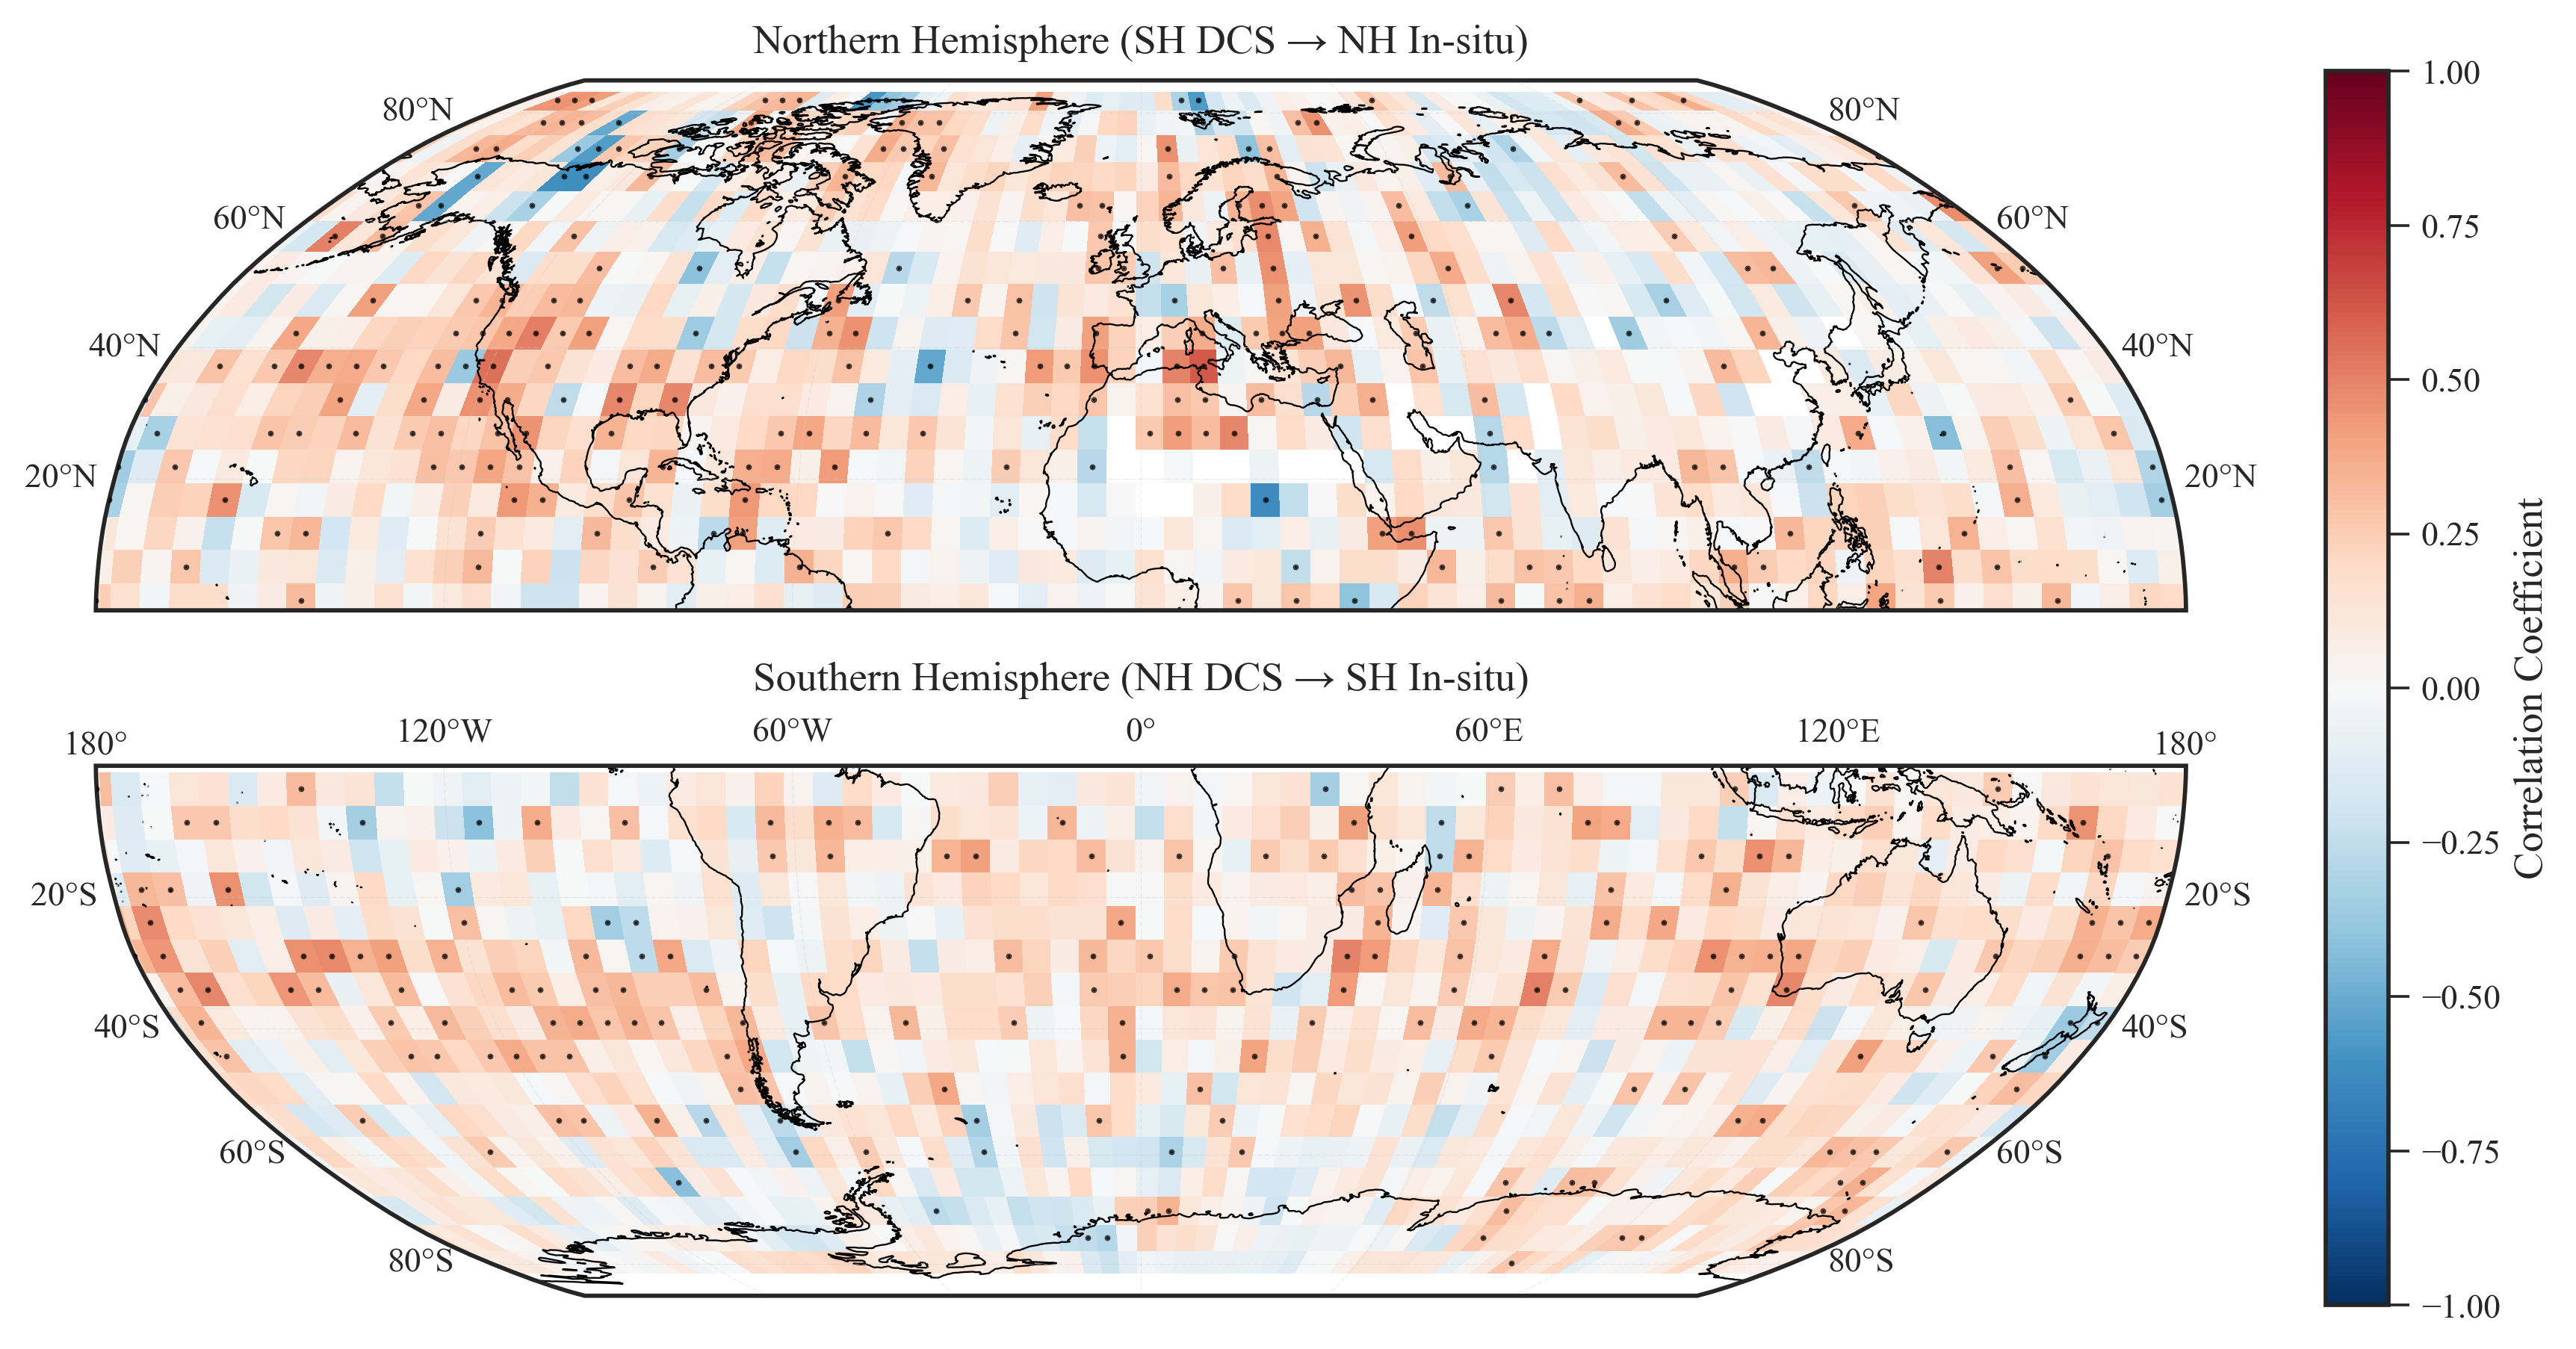

In [16]:
def plot_both_hemispheres_with_robinson_vertical(
    north_data_array,
    south_data_array,
    north_sig_array=None,
    south_sig_array=None,
    min_val=None,
    max_val=None,
    cb_label="Correlation Coefficient",
    north_title=None,
    south_title=None,
    main_title=None,
    cmap="RdBu_r",
    stipple_size=2,
    stipple_color="black",
):
    """
    Plot both hemispheres as vertical subplots with a shared colorbar.
    Parameters:
    -----------
    north_data_array : xarray.DataArray
        DataArray containing the Northern hemisphere data
    south_data_array : xarray.DataArray
        DataArray containing the Southern hemisphere data
    north_sig_array : xarray.DataArray, optional
        Boolean array indicating statistically significant points for Northern hemisphere
    south_sig_array : xarray.DataArray, optional
        Boolean array indicating statistically significant points for Southern hemisphere
    min_val, max_val : float, optional
        Min/max values for colorbar. If None, will use global data min/max.
    cb_label : str, optional
        Label for the colorbar
    north_title, south_title : str, optional
        Titles for respective hemisphere plots
    main_title : str, optional
        Main title for the entire figure
    cmap : str, optional
        Colormap name
    stipple_size : float, optional
        Size of stippling markers
    stipple_color : str, optional
        Color of stippling markers
    """
    # Set the font
    plt.rcParams.update({"font.family": "Times New Roman"})

    # Extract coordinates from the DataArrays
    north_lon = north_data_array.lon.values
    north_lat = north_data_array.lat.values
    north_data = north_data_array.values
    south_lon = south_data_array.lon.values
    south_lat = south_data_array.lat.values
    south_data = south_data_array.values

    # Create meshgrids for both hemispheres
    if north_lon.ndim == 1 and north_lat.ndim == 1:
        north_lon_mesh, north_lat_mesh = np.meshgrid(
            north_lon, north_lat
        )
    else:
        north_lon_mesh, north_lat_mesh = north_lon, north_lat
    if south_lon.ndim == 1 and south_lat.ndim == 1:
        south_lon_mesh, south_lat_mesh = np.meshgrid(
            south_lon, south_lat
        )
    else:
        south_lon_mesh, south_lat_mesh = south_lon, south_lat

    # Set global min and max values if not provided
    if min_val is None:
        min_val = min(np.nanmin(north_data), np.nanmin(south_data))
    if max_val is None:
        max_val = max(np.nanmax(north_data), np.nanmax(south_data))
    # Create figure and gridspec
    fig = plt.figure(figsize=(12, 6.5), dpi=330)
    gs = gridspec.GridSpec(
        2,
        2,
        width_ratios=[
            1,
            0.03,
        ],  # Changed from 0.05 to 0.03 to make colorbar narrower
        height_ratios=[1, 1],
        wspace=0.13,
        hspace=0.25,  # Increased spacing to accommodate the central longitude labels
    )
    # Create subplots with Robinson projection
    ax_north = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson())
    ax_south = fig.add_subplot(gs[1, 0], projection=ccrs.Robinson())
    cax = fig.add_subplot(
        gs[:, 1]
    )  # Shared colorbar axis spanning both rows
    # Set up the colormap
    cmap_obj = plt.get_cmap(cmap)
    cmap_obj.set_under(color="white")

    # cmap_obj.set_bad(color="lightgrey")
    # Set the global extent for both subplots
    ax_north.set_global()
    ax_south.set_global()

    # Plot Northern Hemisphere data
    im_north = ax_north.pcolormesh(
        north_lon_mesh,
        north_lat_mesh,
        north_data,
        transform=ccrs.PlateCarree(),
        cmap=cmap_obj,
        vmin=min_val,
        vmax=max_val,
    )
    # Plot Southern Hemisphere data
    im_south = ax_south.pcolormesh(
        south_lon_mesh,
        south_lat_mesh,
        south_data,
        transform=ccrs.PlateCarree(),
        cmap=cmap_obj,
        vmin=min_val,
        vmax=max_val,
    )

    # Add stippling for significant points in Northern Hemisphere
    if north_sig_array is not None:
        north_sig_points = north_sig_array.values
        # Get coordinates where data is significant
        y_sig_north, x_sig_north = np.where(north_sig_points)
        # Convert to geographical coordinates
        lons_sig_north = north_lon_mesh[y_sig_north, x_sig_north]
        lats_sig_north = north_lat_mesh[y_sig_north, x_sig_north]
        # Plot stippling points
        ax_north.scatter(
            lons_sig_north,
            lats_sig_north,
            transform=ccrs.PlateCarree(),
            s=stipple_size,
            color=stipple_color,
            marker=".",
            alpha=0.7,
            zorder=5,
        )

    # Add stippling for significant points in Southern Hemisphere
    if south_sig_array is not None:
        south_sig_points = south_sig_array.values
        # Get coordinates where data is significant
        y_sig_south, x_sig_south = np.where(south_sig_points)
        # Convert to geographical coordinates
        lons_sig_south = south_lon_mesh[y_sig_south, x_sig_south]
        lats_sig_south = south_lat_mesh[y_sig_south, x_sig_south]
        # Plot stippling points
        ax_south.scatter(
            lons_sig_south,
            lats_sig_south,
            transform=ccrs.PlateCarree(),
            s=stipple_size,
            color=stipple_color,
            marker=".",
            alpha=0.7,
            zorder=5,
        )
    # Add coastlines
    ax_north.coastlines(resolution="50m", lw=0.5)
    ax_south.coastlines(resolution="50m", lw=0.5)
    # Set extent to focus on specific hemispheres
    ax_north.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
    ax_south.set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree())

    # Add subplot titles
    if north_title:
        ax_north.set_title(north_title, fontsize=12, pad=8)
    if south_title:
        ax_south.set_title(south_title, fontsize=12, pad=8)
    # Add main title if provided
    if main_title:
        fig.suptitle(main_title, fontsize=15, fontweight="bold", y=0.95)

    # Configure gridlines for the Northern hemisphere (top plot)
    gl_north = ax_north.gridlines(
        linestyle="-.", lw=0.2, alpha=0.5, draw_labels=True
    )
    gl_north.top_labels = False
    gl_north.right_labels = True  # Show latitude labels on right side
    gl_north.left_labels = True  # Show latitude labels on left side
    gl_north.bottom_labels = False  # Show longitude labels at the bottom (in the middle area)

    # Configure gridlines for the Southern hemisphere (bottom plot)
    gl_south = ax_south.gridlines(
        linestyle="-.", lw=0.2, alpha=0.5, draw_labels=True
    )
    gl_south.top_labels = (
        True  # Show longitude labels at the top (in the middle area)
    )
    gl_south.right_labels = True  # Show latitude labels on right side
    gl_south.left_labels = True  # Show latitude labels on left side
    gl_south.bottom_labels = (
        False  # Hide longitude labels at the bottom
    )

    # Add a shared colorbar
    cb = fig.colorbar(im_north, cax=cax, orientation="vertical")
    cb.set_label(label=cb_label, fontsize=12)
    plt.tight_layout(
        rect=[0, 0, 1, 0.95] if main_title else None
    )  # Adjust for main title if present
    return fig, (ax_north, ax_south)


# Plot both hemispheres as vertical subplots with shared colorbar
fig, (ax_north, ax_south) = (
    plot_both_hemispheres_with_robinson_vertical(
        north_data_array=r_SH_NH * 1.1,
        south_data_array=r_NH_SH * 1.1,
        north_sig_array=sig_SH_NH,
        south_sig_array=sig_NH_SH,
        min_val=-1,
        max_val=1,
        cb_label="Correlation Coefficient",
        north_title="Northern Hemisphere (SH DCS → NH In-situ)",
        south_title="Southern Hemisphere (NH DCS → SH In-situ)",
        # main_title="Inter-hemispheric Teleconnection Patterns",
        main_title=None,
        cmap="RdBu_r",
        stipple_size=2,
        stipple_color="black",
    )
)
plt.show()

### 对南北半球的云砧，原位，DCS去季节趋势

#### 用月平均去季节

In [13]:
# 先把字典定义出来，方便操作
# 数据字典
north_cloud_data_dict = {
    "In-situ Cirrus": insitu_north_full,
    "Anvil Cirrus": all_anvil_north_full,
    "DCS": DCS_north_full,
}

north_cloud_length_data_dict = {
    "In-situ Cirrus": insitu_length_north_full,
    "Anvil Cirrus": all_anvil_length_north_full,
    "DCS": DCS_length_north_full,
}

south_cloud_data_dict = {
    "In-situ Cirrus": insitu_south_full,
    "Anvil Cirrus": all_anvil_south_full,
    "DCS": DCS_south_full,
}

south_cloud_length_data_dict = {
    "In-situ Cirrus": insitu_length_south_full,
    "Anvil Cirrus": all_anvil_length_south_full,
    "DCS": DCS_length_south_full,
}

In [15]:
insitu_north_full

array([[[1.67120802e+00, 9.95260626e-02, 0.00000000e+00, ...,
         4.69212562e-01, 8.18322957e-01, 3.04417044e-01],
        [4.48690414e-01, 7.33317062e-03, 0.00000000e+00, ...,
         2.40240246e-01, 1.20391265e-01, 4.20091331e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 3.49013656e-02, 1.08784335e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.61054172e-02, 0.00000000e+00, ...,
         2.54813135e-02, 1.30737945e-02, 2.91630207e-03],
        [1.00000007e-02, 4.19262089e-02, 2.29357779e-02, ...,
         0.00000000e+00, 4.58400184e-03, 0.00000000e+00]],

       [[4.03157890e-01, 1.86781600e-01, 1.73469394e-01, ...,
         7.34801769e-01, 2.62077063e-01, 2.30550691e-01],
        [3.68004322e-01, 2.76985057e-02, 7.10092783e-02, ...,
         1.78506047e-01, 4.35641259e-01, 8.07185099e-02],
        [8.48708451e-02, 

In [14]:
def deseasonalize_series(series):
    # 确保索引是DatetimeIndex
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)

    # 只用非NaN值计算每个月份的平均值
    monthly_means = (
        series.dropna().groupby(series.dropna().index.month).mean()
    )

    # 创建去季节化的Series，保留原始索引和NaN
    deseasonalized = series.copy()

    # 只对非NaN值进行去季节化
    for month in range(1, 13):
        month_mask = (series.index.month == month) & (~series.isna())
        if month_mask.any():  # 确保该月有数据
            deseasonalized.loc[month_mask] = (
                series.loc[month_mask] - monthly_means[month]
            )

    return deseasonalized


north_deseasonalized_dict = {}
for cloud_type, series in north_cloud_data_dict.items():
    north_deseasonalized_dict[cloud_type] = deseasonalize_series(series)

south_deseasonalized_dict = {}
for cloud_type, series in south_cloud_data_dict.items():
    south_deseasonalized_dict[cloud_type] = deseasonalize_series(series)


north_length_deseasonalized_dict = {}
for cloud_type, series in north_cloud_length_data_dict.items():
    north_length_deseasonalized_dict[cloud_type] = deseasonalize_series(
        series
    )

south_length_deseasonalized_dict = {}
for cloud_type, series in south_cloud_length_data_dict.items():
    south_length_deseasonalized_dict[cloud_type] = deseasonalize_series(
        series
    )


def plot_comparison(original_dict, deseasonalized_dict, region):
    """
    绘制原始数据和去季节化数据的对比图
    """
    plt.figure(figsize=(15, 10))

    for i, (cloud_type) in enumerate(original_dict.keys()):
        plt.subplot(len(original_dict), 1, i + 1)

        # 绘制原始数据
        plt.plot(
            original_dict[cloud_type].index,
            original_dict[cloud_type].values,
            label="Original",
            alpha=0.5,
        )

        # 绘制去季节化数据
        plt.plot(
            deseasonalized_dict[cloud_type].index,
            deseasonalized_dict[cloud_type].values,
            label="Deseasonalized",
        )

        plt.title(f"{region} - {cloud_type}")
        plt.legend()

    plt.tight_layout()
    plt.show()


plot_comparison(
    north_cloud_data_dict,
    north_deseasonalized_dict,
    "Northern Hemisphere",
)
plot_comparison(
    south_cloud_data_dict,
    south_deseasonalized_dict,
    "Southern Hemisphere",
)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

#### 用季节平均去季节

In [ ]:
# 去季节化函数
def deseasonalize_series_by_season(series):
    # 确保索引是DatetimeIndex
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)

    # 定义季节：春(3-5)、夏(6-8)、秋(9-11)、冬(12-2)
    def get_season(month):
        if month in [3, 4, 5]:
            return 1  # 春
        elif month in [6, 7, 8]:
            return 2  # 夏
        elif month in [9, 10, 11]:
            return 3  # 秋
        else:  # 12, 1, 2
            return 4  # 冬

    # 先移除NaN值，获取非NaN数据的索引和值
    series_clean = series.dropna()
    # 只对非NaN数据的索引计算季节
    seasons = series_clean.index.month.map(get_season)
    # 计算每个季节的平均值
    seasonal_means = series_clean.groupby(seasons).mean()

    # 创建去季节化的Series，保留原始索引和NaN
    deseasonalized = series.copy()

    # 只对非NaN值进行去季节化
    full_seasons = series.index.month.map(get_season)  # 完整数据的季节
    for season in range(1, 5):
        season_mask = (full_seasons == season) & (~series.isna())
        if season_mask.any():  # 确保该季有数据
            deseasonalized.loc[season_mask] = (
                series.loc[season_mask] - seasonal_means[season]
            )

    return deseasonalized


# 处理北半球和南半球数据
north_deseasonalized_dict = {}
for cloud_type, series in north_cloud_data_dict.items():
    north_deseasonalized_dict[cloud_type] = (
        deseasonalize_series_by_season(series)
    )

south_deseasonalized_dict = {}
for cloud_type, series in south_cloud_data_dict.items():
    south_deseasonalized_dict[cloud_type] = (
        deseasonalize_series_by_season(series)
    )

north_length_deseasonalized_dict = {}
for cloud_type, series in north_cloud_length_data_dict.items():
    north_length_deseasonalized_dict[cloud_type] = (
        deseasonalize_series_by_season(series)
    )

south_length_deseasonalized_dict = {}
for cloud_type, series in south_cloud_length_data_dict.items():
    south_length_deseasonalized_dict[cloud_type] = (
        deseasonalize_series_by_season(series)
    )


# 绘图函数（保持不变）
def plot_comparison(original_dict, deseasonalized_dict, region):
    plt.figure(figsize=(15, 10))
    for i, (cloud_type) in enumerate(original_dict.keys()):
        plt.subplot(len(original_dict), 1, i + 1)
        plt.plot(
            original_dict[cloud_type].index,
            original_dict[cloud_type].values,
            label="Original",
            alpha=0.5,
        )
        plt.plot(
            deseasonalized_dict[cloud_type].index,
            deseasonalized_dict[cloud_type].values,
            label="Deseasonalized",
        )
        plt.title(f"{region} - {cloud_type}")
        plt.legend()
    plt.tight_layout()
    plt.show()


# 绘制对比图
plot_comparison(
    north_cloud_data_dict,
    north_deseasonalized_dict,
    "Northern Hemisphere",
)
plot_comparison(
    south_cloud_data_dict,
    south_deseasonalized_dict,
    "Southern Hemisphere",
)

### 绘制时间序列数据验证一下

In [ ]:
def plot_cloud_frequencies(
    time_range,
    north_cloud_data,
    south_cloud_data,
    figsize=(12, 8),
    dpi=380,
    xtick_interval=8,
    ylim=(0, 0.16),
):
    fig, axs = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)

    hemispheres = [
        ("Northern", north_cloud_data),
        ("Southern", south_cloud_data),
    ]

    for ax, (hemisphere, cloud_data) in zip(axs, hemispheres):
        for label, data in cloud_data.items():
            if label == "DCS":
                ax.bar(
                    time_range,
                    data,
                    label=label,
                    color="grey",
                    alpha=0.5,
                    width=15,
                )
            elif label == "In-situ Cirrus":
                ax.plot(
                    time_range,
                    data,
                    label=label,
                    color=(140 / 255, 156 / 255, 184 / 255),
                    linewidth=2,
                )
            elif label == "Anvil Cirrus":
                ax.plot(
                    time_range,
                    data,
                    label=label,
                    color=(199 / 255, 121 / 255, 119 / 255),
                    linewidth=2,
                )

        ax.set_ylabel("Cloud Frequency (%)", fontsize=15)
        ax.set_title(f"{hemisphere} Hemisphere", fontsize=16)
        ax.grid(True, linestyle="--", alpha=0.7)
        ax.set_ylim(ylim)
        # ax.set_yticks(np.arange(0, 0.17, 0.04))

        if ax == axs[1]:
            ax.legend(
                loc="lower center",
                ncols=3,
                fontsize=12,
                frameon=False,
                bbox_to_anchor=(0.5, -0.47),
            )

    axs[-1].set_xlabel("Time")
    plt.xticks(
        time_range[::xtick_interval],
        [
            pd.to_datetime(time).strftime("%Y/%m")
            for time in time_range[::xtick_interval]
        ],
    )
    plt.xlim(time_range[0], time_range[-1])

    plt.tight_layout()
    plt.show()


plot_cloud_frequencies(
    full_time_range,
    north_cloud_data_dict,
    south_cloud_data_dict,
    figsize=(15, 6),
    dpi=380,
    ylim=(0, 0.16),
)